In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Import data and summarize it

In [97]:
df = pd.read_csv("data.csv",sep=";")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [99]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### Dealing with missing values

In [100]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [101]:
df.dropna(thresh=17,inplace=True)  ## if a row has more ore equal to 2 missing feature lets delete it instead of fixing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  839 non-null    int64  
 1   circularity                  837 non-null    float64
 2   distance_circularity         837 non-null    float64
 3   radius_ratio                 833 non-null    float64
 4   pr.axis_aspect_ratio         838 non-null    float64
 5   max.length_aspect_ratio      839 non-null    int64  
 6   scatter_ratio                839 non-null    float64
 7   elongatedness                838 non-null    float64
 8   pr.axis_rectangularity       836 non-null    float64
 9   max.length_rectangularity    839 non-null    int64  
 10  scaled_variance              837 non-null    float64
 11  scaled_variance.1            837 non-null    float64
 12  scaled_radius_of_gyration    839 non-null    float64
 13  scaled_radius_of_gyr

In [102]:
missing = df[df.isna().any(axis=1)]
print(len(missing),"missing data point")

26 missing data point


In [103]:
missing.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193


### I will use interpolate method of pandas to keep missing values since missing value is just one column I think there wouldnt be huge problem

In [104]:
df = df.interpolate(limit=1) ## if 2 rows
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [105]:
missing = df[df.isna().any(axis=1)]
print(len(missing),"missing data point")

0 missing data point


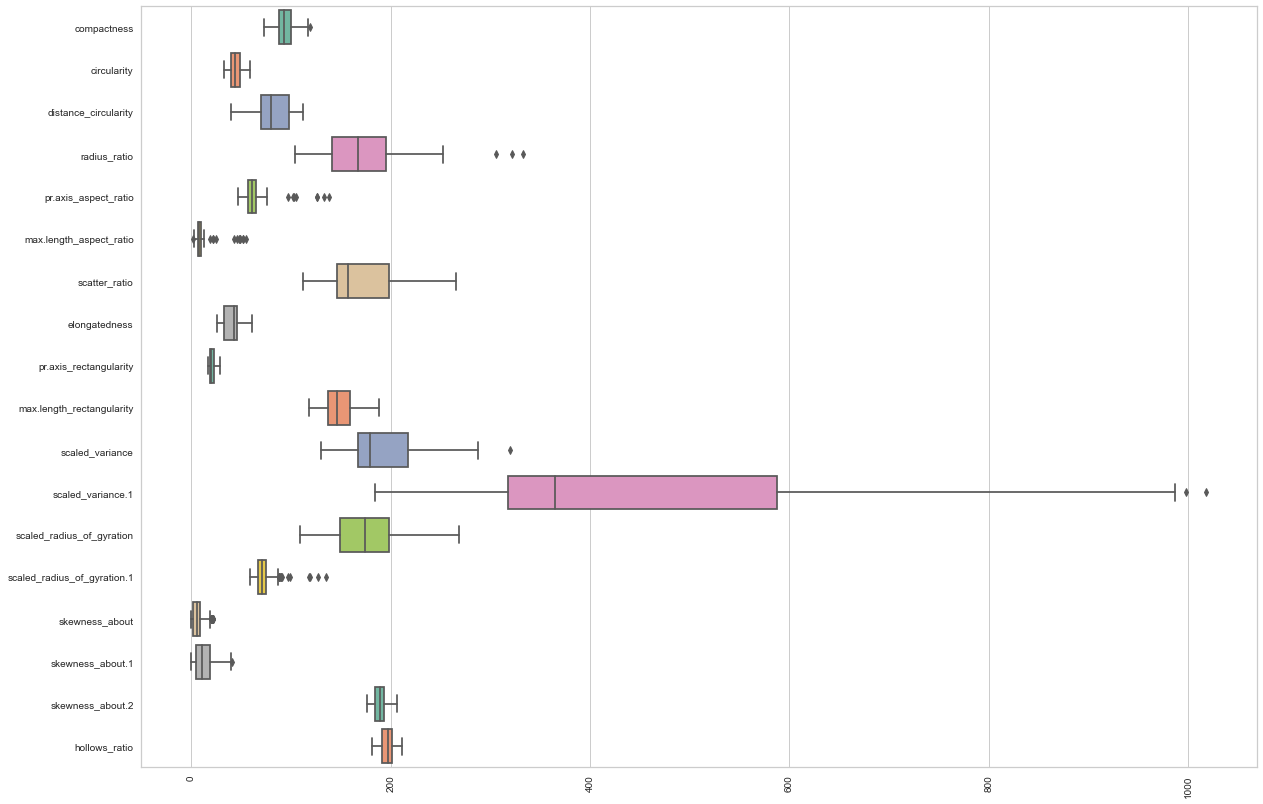

In [106]:
plt.figure(figsize=(20,14))
sns.boxplot(data=df,orient="h", palette="Set2")
plt.xticks(rotation=90);

###  As we can see from the boxplots the columns that includes most outliers are "pr.axis_aspect_ratio","max.length_aspect_ratio" and scaled_radius_of_gyration.1"

###  Lets use Inner quartile range method to get rid of outliers.

In [107]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 

IQR = Q3 - Q1  

In [108]:
cols = df.columns
df_out = df[~((df[cols] < (Q1 - 2* IQR)) |(df[cols] > (Q3 + 2* IQR))).any(axis=1)]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  827 non-null    int64  
 1   circularity                  827 non-null    float64
 2   distance_circularity         827 non-null    float64
 3   radius_ratio                 827 non-null    float64
 4   pr.axis_aspect_ratio         827 non-null    float64
 5   max.length_aspect_ratio      827 non-null    int64  
 6   scatter_ratio                827 non-null    float64
 7   elongatedness                827 non-null    float64
 8   pr.axis_rectangularity       827 non-null    float64
 9   max.length_rectangularity    827 non-null    int64  
 10  scaled_variance              827 non-null    float64
 11  scaled_variance.1            827 non-null    float64
 12  scaled_radius_of_gyration    827 non-null    float64
 13  scaled_radius_of_gyr

In [109]:
print(len(df)-len(df_out)," data point were deleted due to being outliers")

12  data point were deleted due to being outliers


### Lets visualize our cleaned data

<AxesSubplot:>

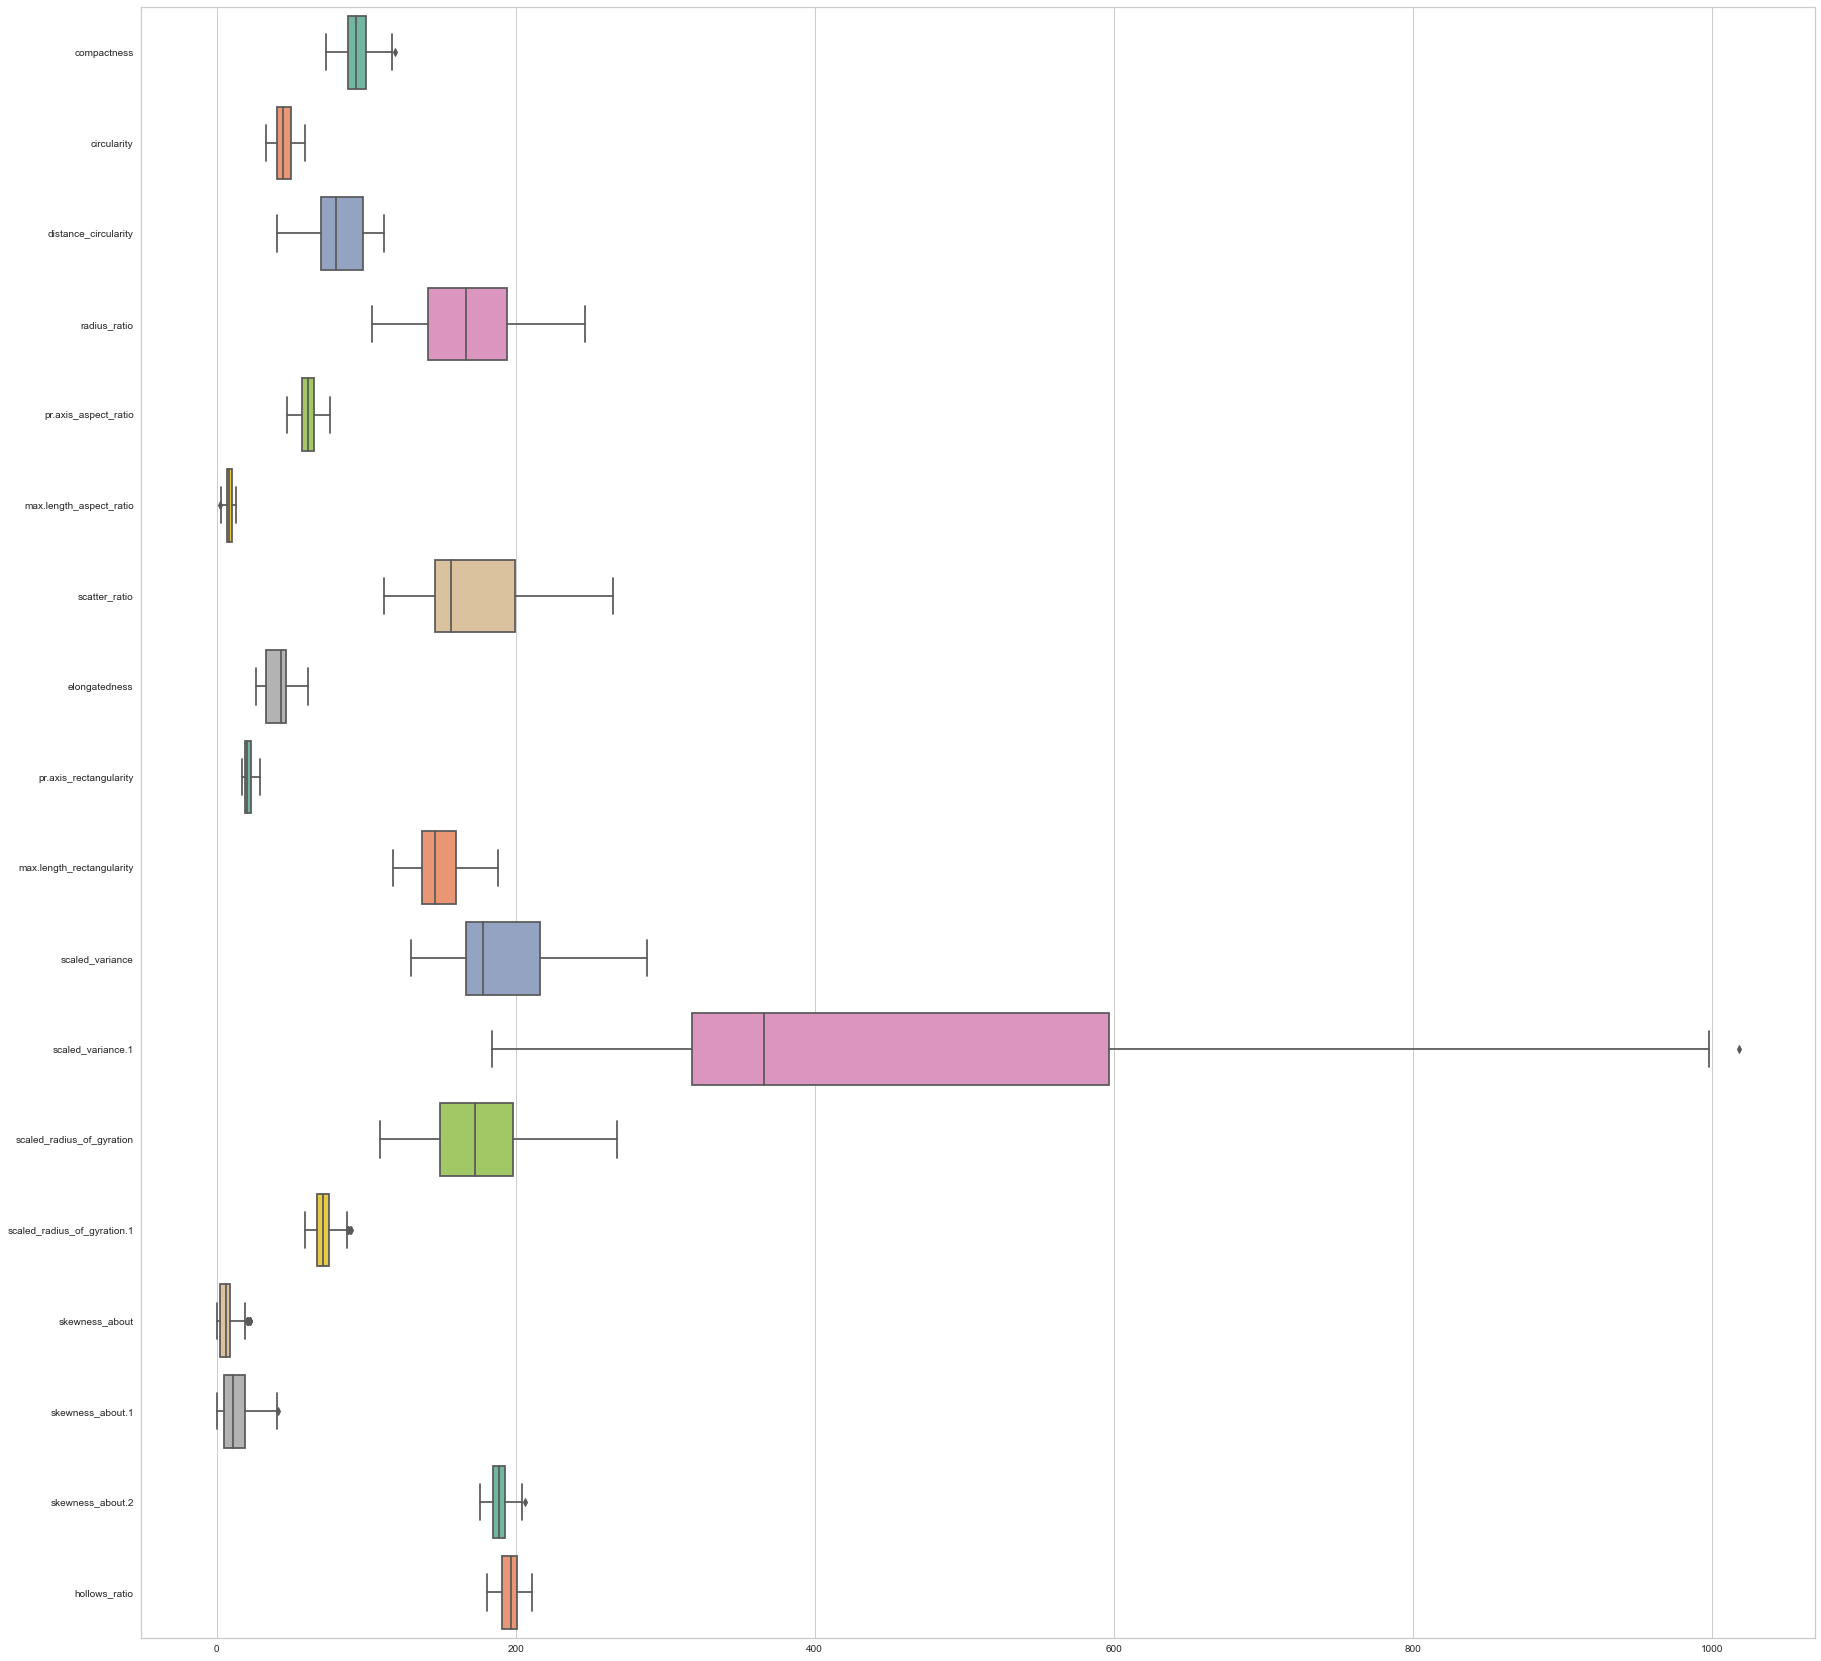

In [110]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df_out, orient="h", palette="Set2")

###  Looks like there are so few outliers left and they are very close to center so we dont need to deal with them. They are probably meaningful outliers

## Data Transformation
#### All of our features numerical so lets transform them between 0-1 to make it easy to calculate

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_df = scaler.fit_transform(df_out[cols])
norm_df = pd.DataFrame(data = norm_df , columns=cols)

In [112]:
norm_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.478261,0.576923,0.597222,0.521127,0.862069,0.727273,0.326797,0.457143,0.250000,0.585714,0.291139,0.233813,0.471698,0.354839,0.272727,0.390244,0.366667,0.533333
1,0.391304,0.307692,0.611111,0.260563,0.344828,0.636364,0.241830,0.542857,0.166667,0.357143,0.253165,0.175060,0.308176,0.419355,0.409091,0.341463,0.433333,0.600000
2,0.673913,0.653846,0.916667,0.739437,0.655172,0.727273,0.620915,0.171429,0.500000,0.571429,0.588608,0.540767,0.698113,0.451613,0.636364,0.219512,0.400000,0.500000
3,0.434783,0.307692,0.583333,0.387324,0.551724,0.636364,0.209150,0.571429,0.166667,0.357143,0.189873,0.149880,0.113208,0.129032,0.272727,0.243902,0.766667,0.866667
4,0.739130,0.403846,0.916667,0.478873,0.103448,0.363636,0.934641,0.000000,0.916667,0.728571,0.949367,0.926859,0.974843,0.838710,0.227273,0.219512,0.166667,0.066667


In [113]:
norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,827.0,0.452263,0.178835,0.0,0.326087,0.434783,0.586957,1.0
circularity,827.0,0.455516,0.237824,0.0,0.269231,0.423077,0.634615,1.0
distance_circularity,827.0,0.586877,0.219497,0.0,0.416667,0.555556,0.805556,1.0
radius_ratio,827.0,0.451658,0.224884,0.0,0.260563,0.443662,0.633803,1.0
pr.axis_aspect_ratio,827.0,0.487991,0.194196,0.0,0.344828,0.482759,0.620690,1.0
max.length_aspect_ratio,827.0,0.556337,0.190292,0.0,0.454545,0.545455,0.727273,1.0
scatter_ratio,827.0,0.373766,0.218370,0.0,0.222222,0.294118,0.571895,1.0
elongatedness,827.0,0.424598,0.224120,0.0,0.200000,0.485714,0.571429,1.0
pr.axis_rectangularity,827.0,0.301642,0.217023,0.0,0.166667,0.250000,0.500000,1.0
max.length_rectangularity,827.0,0.428623,0.208548,0.0,0.271429,0.400000,0.600000,1.0


### Lets visualize our cleaned and transformed data

In [114]:
sns.pairplot(norm_df,corner = True,diag_kind='kde')

### I will drop some features which doesnt show any correlation to other features

### As we can see from the graphs above some features have strong correlations for example "scaled_variance1" and "scatter_ratio" has very strong correlation that it is almost  a linear line. Later on we can use this information to feature selection

### I might delete some features which doesnt have correlation with rest of the data

In [116]:
norm_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,hollows_ratio
compactness,1.000000,0.687973,0.788946,0.743536,0.503143,0.812423,-0.788152,0.811192,0.680205,0.793323,0.816077,0.590252,-0.248392,0.354849
circularity,0.687973,1.000000,0.792035,0.649432,0.566405,0.848756,-0.820917,0.844593,0.961328,0.805065,0.836824,0.923581,0.053912,0.045515
distance_circularity,0.788946,0.792035,1.000000,0.814061,0.673028,0.906547,-0.911409,0.891698,0.774530,0.884915,0.887600,0.707160,-0.249633,0.327468
radius_ratio,0.743536,0.649432,0.814061,1.000000,0.475489,0.791119,-0.844508,0.760156,0.586985,0.793351,0.776347,0.561030,-0.399046,0.496161
max.length_aspect_ratio,0.503143,0.566405,0.673028,0.475489,1.000000,0.494066,-0.509213,0.491507,0.647517,0.409624,0.452001,0.399848,-0.361473,0.418350
scatter_ratio,0.812423,0.848756,0.906547,0.791119,0.494066,1.000000,-0.973290,0.989153,0.812772,0.981179,0.994239,0.803251,0.002012,0.111618
elongatedness,-0.788152,-0.820917,-0.911409,-0.844508,-0.509213,-0.973290,1.000000,-0.947630,-0.777277,-0.965176,-0.954762,-0.768184,0.094692,-0.210360
pr.axis_rectangularity,0.811192,0.844593,0.891698,0.760156,0.491507,0.989153,-0.947630,1.000000,0.814734,0.965555,0.987227,0.800198,0.019978,0.090294
max.length_rectangularity,0.680205,0.961328,0.774530,0.586985,0.647517,0.812772,-0.777277,0.814734,1.000000,0.756798,0.798475,0.867358,0.039660,0.072766
scaled_variance,0.793323,0.805065,0.884915,0.793351,0.409624,0.981179,-0.965176,0.965555,0.756798,1.000000,0.978809,0.790562,0.017950,0.089124


<AxesSubplot:>

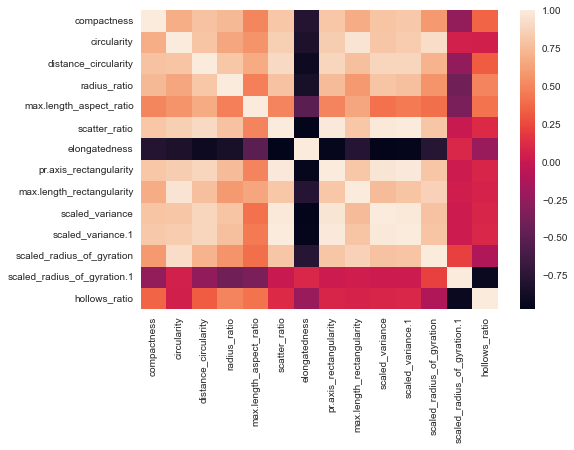

In [117]:
sns.heatmap(norm_df.corr())

### Lets apply our first clustering algorithm
### I will use KMeans as my first clustering algorithm

#### I will use elbow method to find out best k suited for KMeans

In [118]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

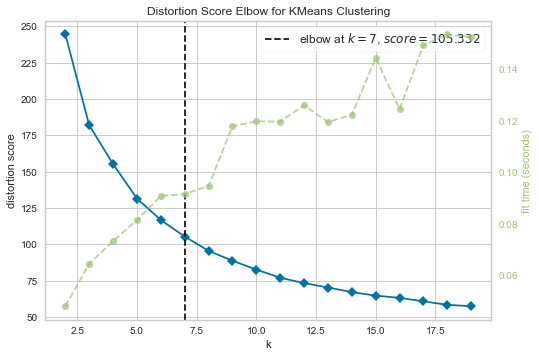

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(2,20));
visualizer.fit(norm_df)
visualizer.show()

### Looks like k=6 was best for our KMeans algorithm

In [120]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(norm_df)

KMeans(n_clusters=6)

### Lets Visualize our KMeans clusterings results using PCA 

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_df)

In [122]:
pca_df = pd.DataFrame(data = pca_data)
pca_df["labels"] = kmeans.labels_
pca_df.columns = ["PCA1","PCA2","labels"]
pca_df.head()

### Lets see our reducted data

,PCA1,PCA2,labels
0,0.075205,-0.090812,0
1,-0.329810,-0.134325,0
2,0.799554,0.038311,1
3,-0.355457,-0.564758,4
4,1.169287,0.833684,2


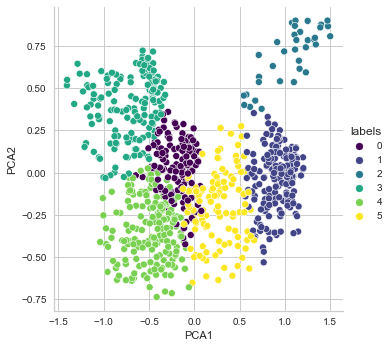

In [123]:
sns.relplot(x='PCA1', y='PCA2', hue='labels', data=pca_df,palette="viridis")

###  Now lets try our second clustering algorithm
### For this one I will chosee hierarchial clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering

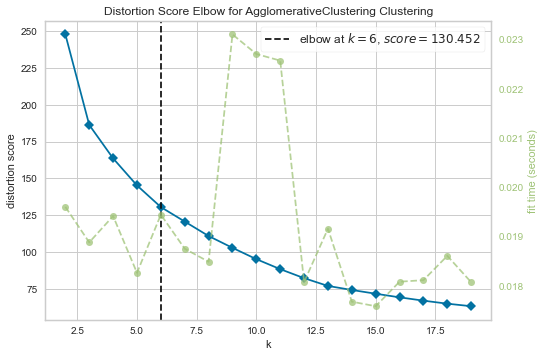

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
agg = AgglomerativeClustering()
vis = KElbowVisualizer(agg,k=(2,20))
vis.fit(norm_df)
vis.show()

###  Look like we have k=6 as best k for agglomeartive clustering similar to KMeans

In [126]:
agg = AgglomerativeClustering(6)
agg.fit(norm_df)

AgglomerativeClustering(n_clusters=6)

In [127]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_df)

pca_df = pd.DataFrame(data = pca_data)
pca_df["labels"] = agg.labels_
pca_df.columns = ["PCA1","PCA2","labels"]
pca_df.head()

,PCA1,PCA2,labels
0,0.075205,-0.090812,4
1,-0.329810,-0.134325,2
2,0.799554,0.038311,1
3,-0.355457,-0.564758,2
4,1.169287,0.833684,3


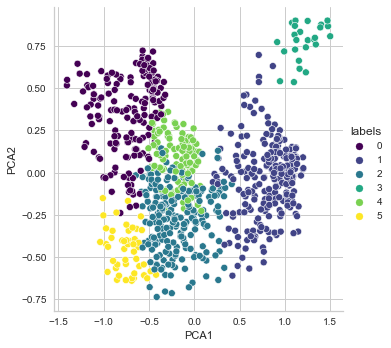

In [128]:
sns.relplot(x='PCA1', y='PCA2', hue='labels', data=pca_df,palette="viridis")

In [129]:
print(sum(agg.labels_ == kmeans.labels_),"data were clustered same in KMeans and agglomerative clustering\n",len(agg.labels_)-sum(agg.labels_ == kmeans.labels_)," data were clustered different")

185 data were clustered same in KMeans and agglomerative clustering
 642  data were clustered different


In [130]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(0.35)
dbs.fit(norm_df)

DBSCAN(eps=0.35)

In [131]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_df)

pca_df = pd.DataFrame(data = pca_data)
pca_df["labels"] = dbs.labels_
pca_df.columns = ["PCA1","PCA2","labels"]
pca_df.head()

,PCA1,PCA2,labels
0,0.075205,-0.090812,0
1,-0.329810,-0.134325,0
2,0.799554,0.038311,0
3,-0.355457,-0.564758,0
4,1.169287,0.833684,-1


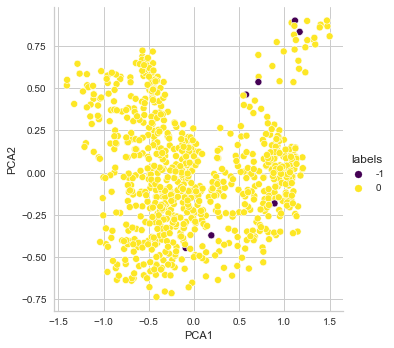

In [132]:
sns.relplot(x='PCA1', y='PCA2', hue='labels', data=pca_df,palette="viridis")

### 